# [Room Occupancy] Data Exploration


### Prepare Workspace

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import datetime
from datetime import timezone

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sys.path.append('../code')
import prepare as pr
import explore as ex

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
data_dir = 'C:/Users/makayser/Desktop/wattx_local/'
fn_activations = 'device_activations.csv'


### Prepare Data


Exploratory questions:
- Any unknowns?
- Any outliers?
- Any duplicates?
- Any anomaly sensor device, that should be excluded?
- Largest and smallest differences between sensor activations? (distributions)


In [4]:
df = pd.read_csv(data_dir + fn_activations, parse_dates=True)
df['timestamp'] = pd.to_datetime(df['time'])
df['device'] = df['device'].apply(pr.device_nr)
len(df)

9045

In [5]:
df.head()

,time,device,device_activated,timestamp
0,2016-07-01 04:23:32,6,1,2016-07-01 04:23:32
1,2016-07-01 06:52:57,2,1,2016-07-01 06:52:57
2,2016-07-01 06:53:00,2,1,2016-07-01 06:53:00
3,2016-07-01 06:56:41,2,1,2016-07-01 06:56:41
4,2016-07-01 07:00:01,6,1,2016-07-01 07:00:01


In [6]:
df.tail()

,time,device,device_activated,timestamp
9040,2016-08-31 17:26:23,6,1,2016-08-31 17:26:23
9041,2016-08-31 17:34:34,4,1,2016-08-31 17:34:34
9042,2016-08-31 17:34:42,6,1,2016-08-31 17:34:42
9043,2016-08-31 17:40:03,4,1,2016-08-31 17:40:03
9044,2016-08-31 17:50:03,6,1,2016-08-31 17:50:03


In [7]:
df.dtypes

time                        object
device                       int64
device_activated             int64
timestamp           datetime64[ns]
dtype: object

### Explore and Prepare Data

In [8]:
df.groupby('device').describe()

device_activated                                   
                  count mean  std  min  25%  50%  75%  max
device                                                    
1                 922.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2                2930.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
3                 741.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4                 901.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5                1256.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
6                2134.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
7                 161.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [9]:
_temp = df.groupby('device').apply(lambda x : x['timestamp'].diff())
_temp.groupby('device').describe()

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
1,921,0 days 00:57:53.192182,0 days 05:55:47.969994,0 days 00:00:01,0 days 00:06:18,0 days 00:09:59,0 days 00:16:57,3 days 16:42:18
2,2929,0 days 00:30:11.692727,0 days 04:05:49.590420,0 days 00:00:00,0 days 00:01:42,0 days 00:05:34,0 days 00:09:51,3 days 15:36:20
3,740,0 days 01:59:14.755405,0 days 08:33:26.386222,0 days 00:03:05,0 days 00:06:17.750000,0 days 00:11:09.500000,0 days 00:22:11.500000,3 days 19:23:58
4,900,0 days 01:38:18.240000,0 days 08:40:36.358296,0 days 00:03:03,0 days 00:06:45.750000,0 days 00:11:38,0 days 00:23:14.500000,4 days 04:18:32
5,1255,0 days 01:10:21.781673,0 days 07:39:41.748839,0 days 00:00:01,0 days 00:06:25,0 days 00:09:49,0 days 00:15:34.500000,5 days 16:06:32
6,2133,0 days 00:41:33.572902,0 days 04:20:44.346346,0 days 00:00:01,0 days 00:06:33,0 days 00:10:22,0 days 00:16:46,3 days 06:42:28
7,160,0 days 08:22:06.218750,1 days 20:47:39.979569,0 days 00:03:11,0 days 00:07:05.750000,0 days 00:13:40,0 days 00:48:36.500000,20 days 22:43:32


In [10]:
df = pr.handle_duplicates(df, df.device.drop_duplicates().values)
len(df)

[INFO] Device 6 length 2134
[INFO] Device 2 length 2930
	[ERROR] Device 2 contains 54 duplicates.
[INFO] Device 4 length 901
[INFO] Device 3 length 741
[INFO] Device 5 length 1256
[INFO] Device 7 length 161
[INFO] Device 1 length 922


8991

In [11]:
df.head()

,time,device,device_activated,timestamp
0,2016-07-01 04:23:32,6,1,2016-07-01 04:23:32
1,2016-07-01 06:52:57,2,1,2016-07-01 06:52:57
2,2016-07-01 06:53:00,2,1,2016-07-01 06:53:00
3,2016-07-01 06:56:41,2,1,2016-07-01 06:56:41
4,2016-07-01 07:00:01,6,1,2016-07-01 07:00:01


In [12]:
df_r = pr.resample(df, window='1H')

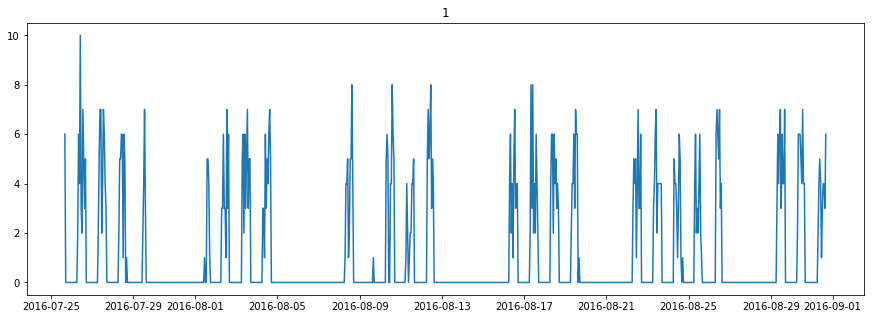

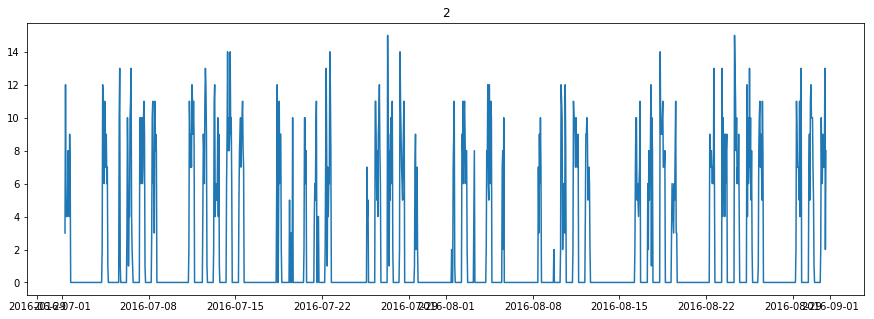

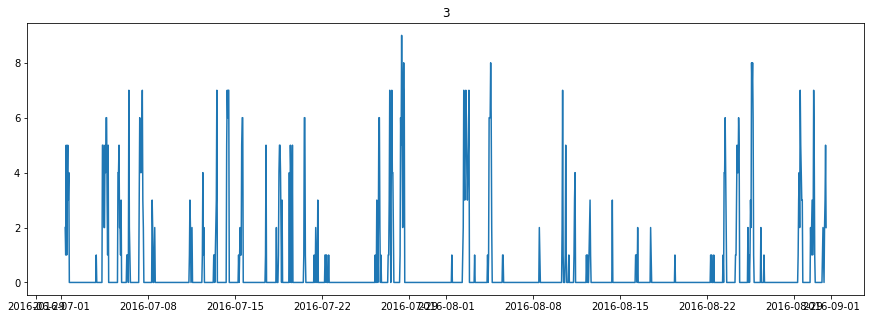

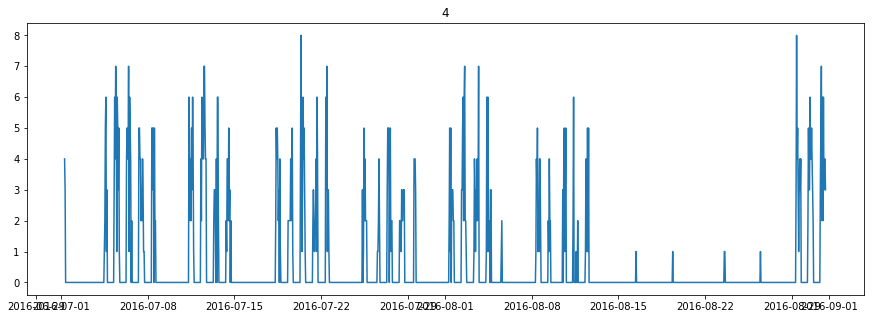

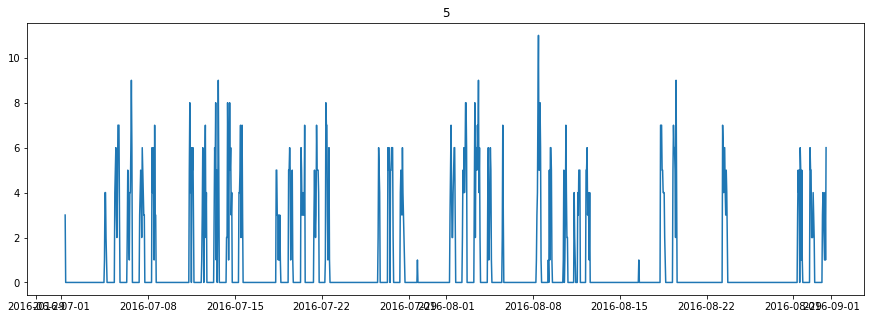

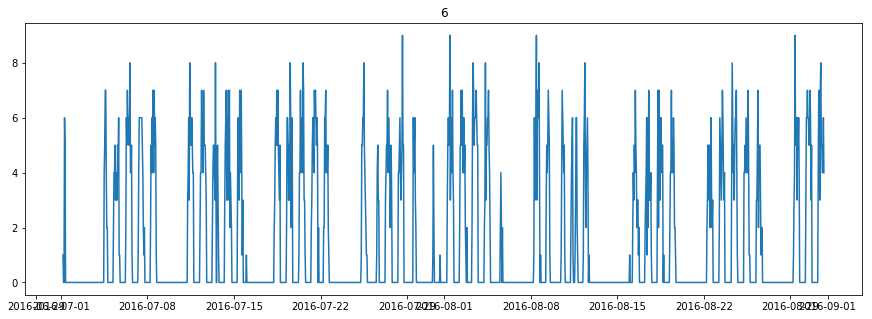

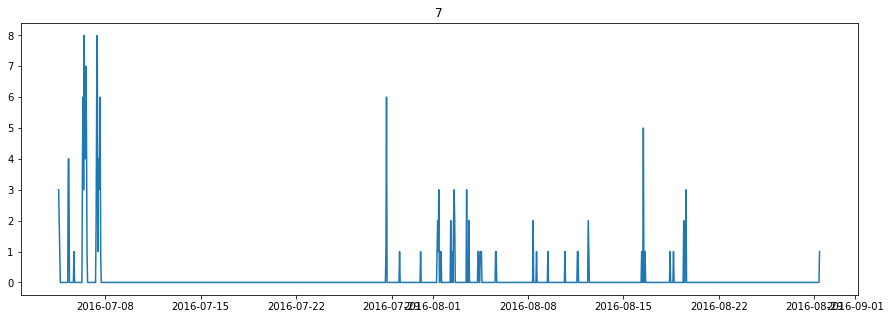

In [13]:
ex.plot_single(df_r, 'device_activated')

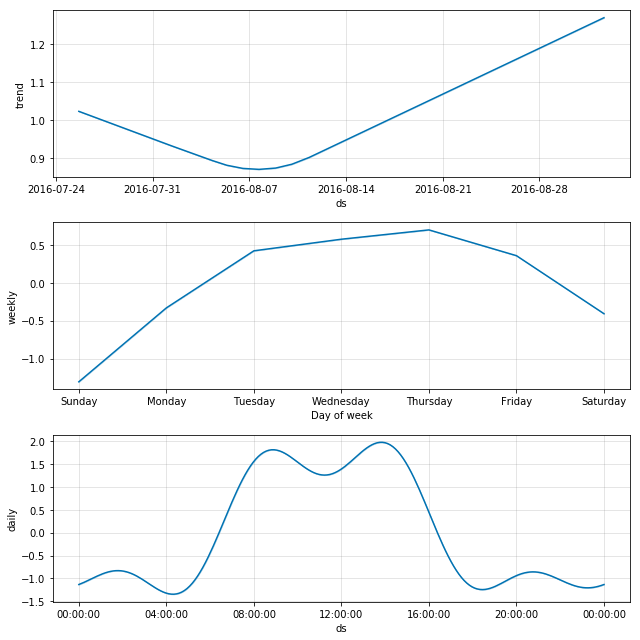

In [14]:
ex.seasonal_distribution(df_r,1,'device_activated')

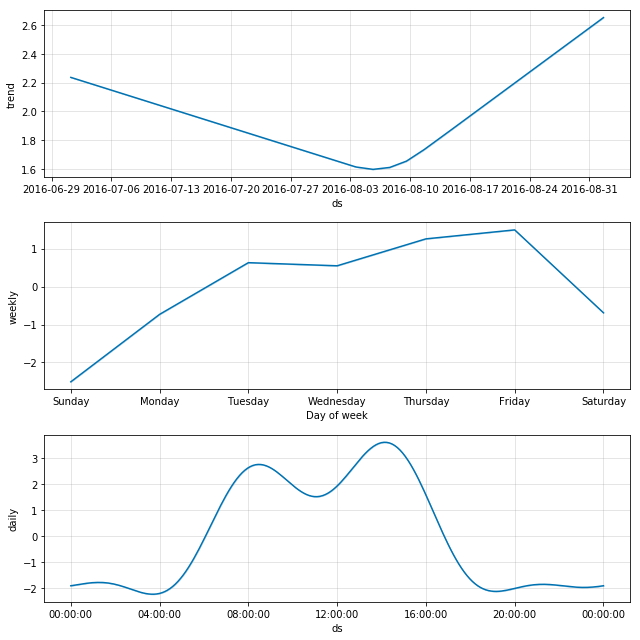

In [15]:
ex.seasonal_distribution(df_r,2,'device_activated')

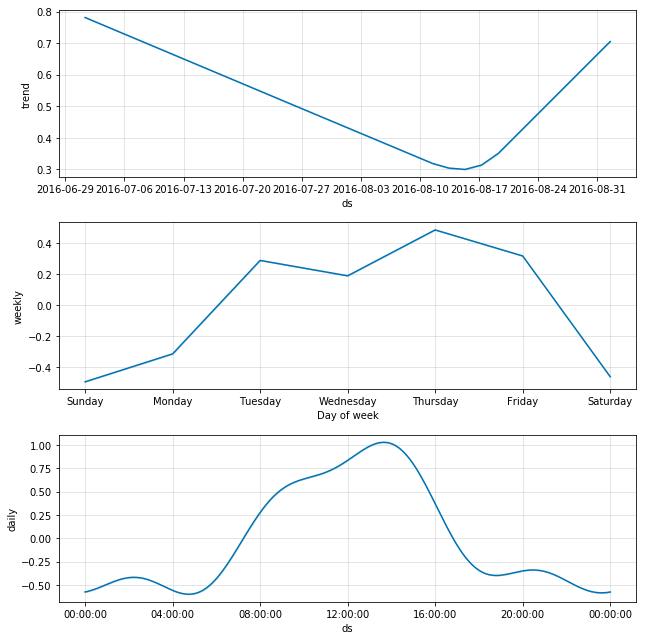

In [16]:
ex.seasonal_distribution(df_r,3,'device_activated')

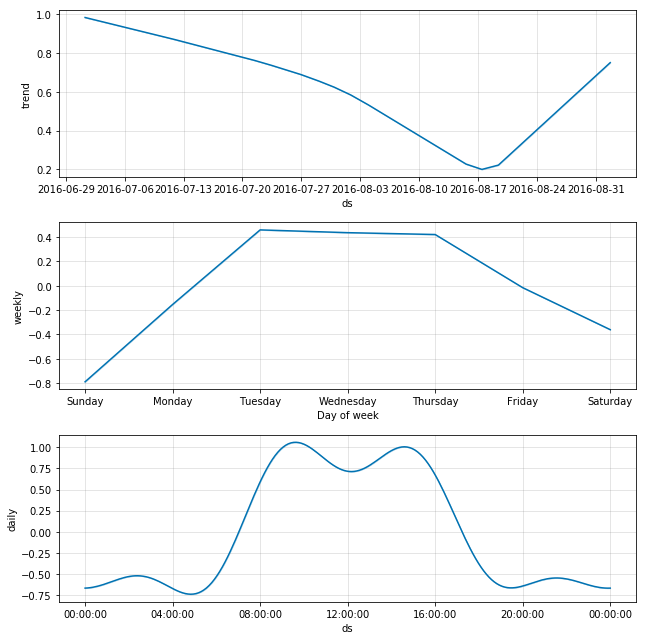

In [17]:
ex.seasonal_distribution(df_r,4,'device_activated')

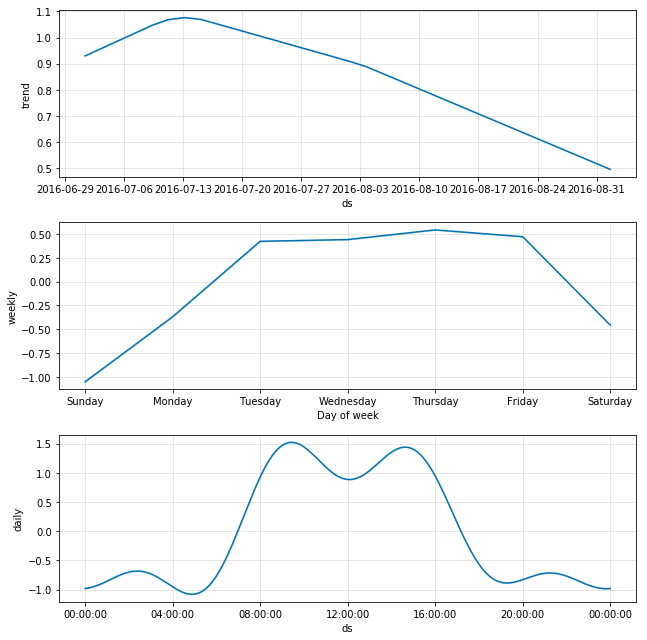

In [18]:
ex.seasonal_distribution(df_r,5,'device_activated')

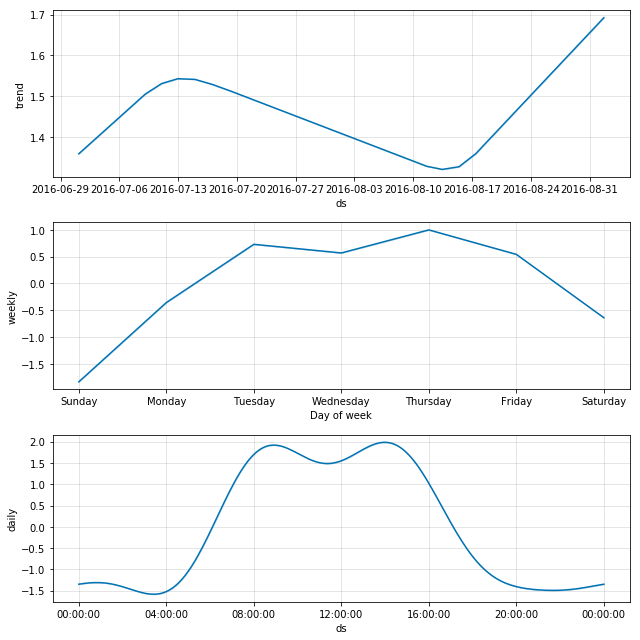

In [19]:
ex.seasonal_distribution(df_r,6,'device_activated')

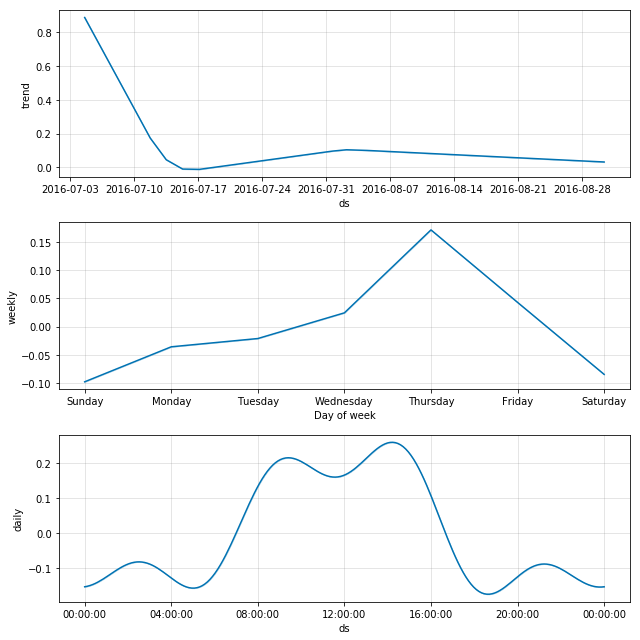

In [20]:
ex.seasonal_distribution(df_r,7,'device_activated')

## Feature Engineering

### Rolling Window

In [21]:
df_w = df_r.copy()
df_w['occupied'] = pr.get_occupied(df_w, 'device_activated')

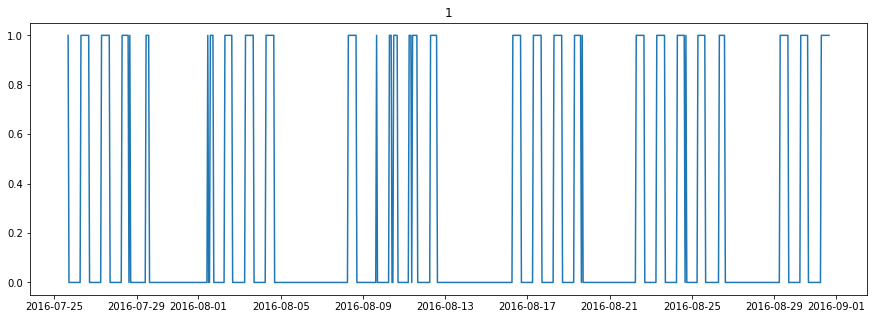

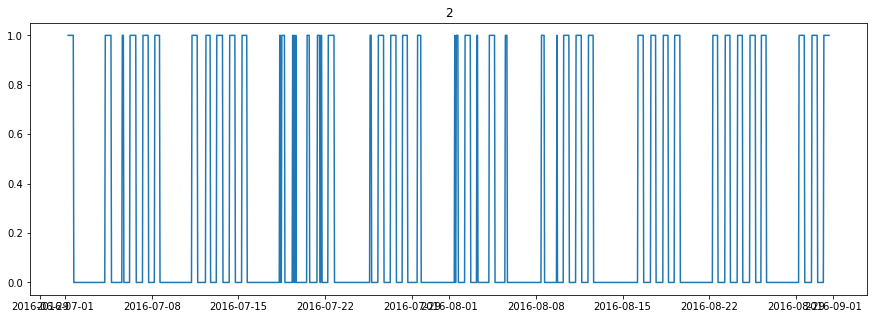

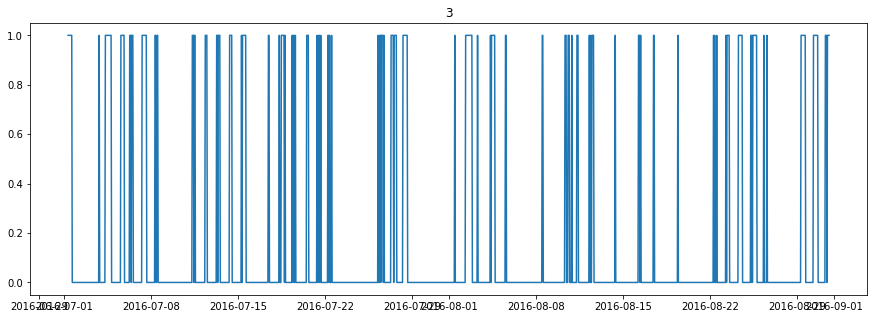

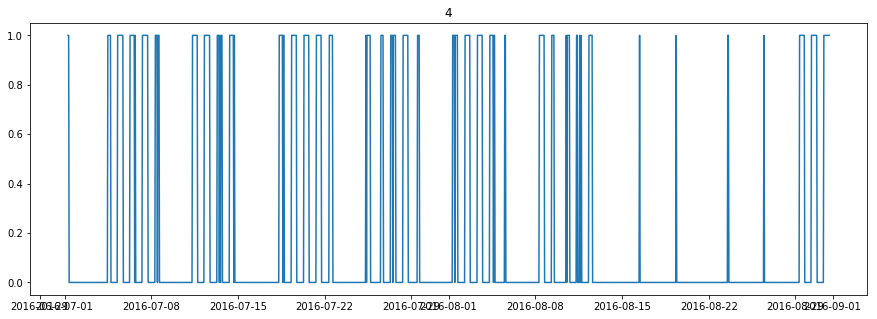

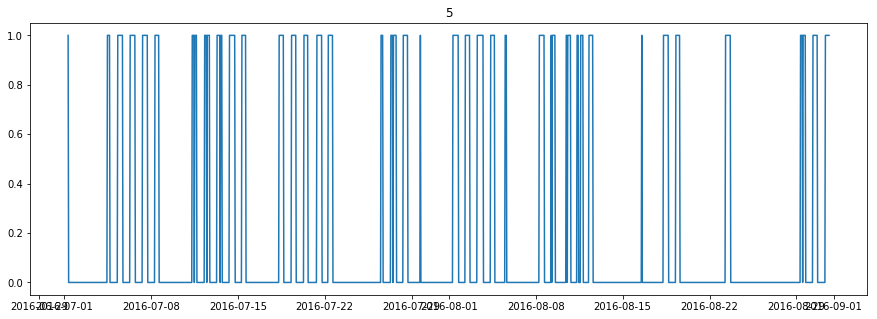

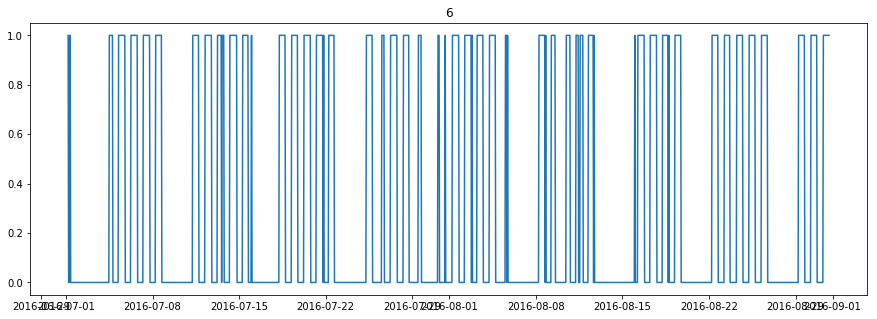

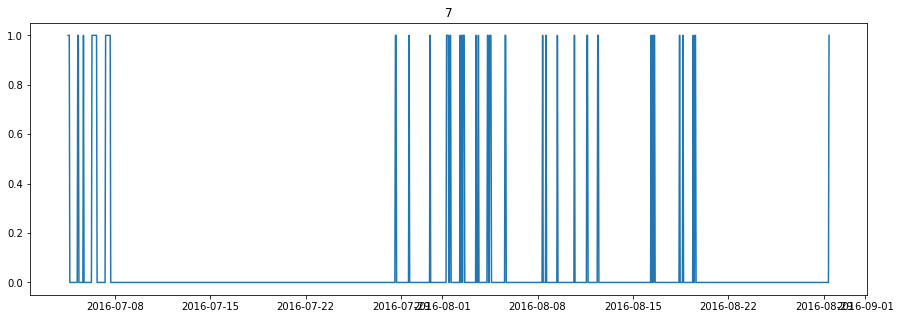

In [22]:
ex.plot_single(df_w, 'occupied')

### Weekday

In [23]:
df_w['weekday'] = df_w.index.get_level_values('timestamp').strftime('%w').values

In [24]:
df_w.head()

device  device_activated           timestamp  \
device timestamp                                                           
1      2016-07-25 16:00:00       1                 6 2016-07-25 16:00:00   
       2016-07-25 17:00:00       1                 0 2016-07-25 17:00:00   
       2016-07-25 18:00:00       1                 0 2016-07-25 18:00:00   
       2016-07-25 19:00:00       1                 0 2016-07-25 19:00:00   
       2016-07-25 20:00:00       1                 0 2016-07-25 20:00:00   

                            occupied weekday  
device timestamp                              
1      2016-07-25 16:00:00         1       1  
       2016-07-25 17:00:00         0       1  
       2016-07-25 18:00:00         0       1  
       2016-07-25 19:00:00         0       1  
       2016-07-25 20:00:00         0       1

In [25]:
df_w.groupby('device')['device_activated'].describe()

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
1,889.0,1.037120,2.038419,0.0,0.0,0.0,0.0,10.0
2,1475.0,1.949831,3.649714,0.0,0.0,0.0,2.0,15.0
3,1471.0,0.503739,1.433736,0.0,0.0,0.0,0.0,9.0
4,1475.0,0.610847,1.467566,0.0,0.0,0.0,0.0,8.0
5,1472.0,0.853261,1.920285,0.0,0.0,0.0,0.0,11.0
6,1478.0,1.443843,2.314600,0.0,0.0,0.0,3.0,9.0
7,1340.0,0.120149,0.680276,0.0,0.0,0.0,0.0,8.0


In [26]:
#Monday is 0 and Sunday is 6
df_w.groupby('weekday').sum()

,device,device_activated,occupied
weekday,,,
0,5784,20,9
1,5764,1628,361
2,5808,1901,424
3,5660,2049,442
4,5304,1960,415
5,5656,1432,315
6,5784,1,1


### Time Period (bins)

In [27]:
df_w['timeperiod'] = df_w.index.get_level_values('timestamp').to_series().apply(lambda x: pr.bin_time(x)).values

In [28]:
df_w.head()

device  device_activated           timestamp  \
device timestamp                                                           
1      2016-07-25 16:00:00       1                 6 2016-07-25 16:00:00   
       2016-07-25 17:00:00       1                 0 2016-07-25 17:00:00   
       2016-07-25 18:00:00       1                 0 2016-07-25 18:00:00   
       2016-07-25 19:00:00       1                 0 2016-07-25 19:00:00   
       2016-07-25 20:00:00       1                 0 2016-07-25 20:00:00   

                            occupied weekday  timeperiod  
device timestamp                                          
1      2016-07-25 16:00:00         1       1           4  
       2016-07-25 17:00:00         0       1           4  
       2016-07-25 18:00:00         0       1           4  
       2016-07-25 19:00:00         0       1           4  
       2016-07-25 20:00:00         0       1           0

### Time

In [29]:
df_w['time'] = df_w.index.get_level_values('timestamp').strftime('%H:%M').values

In [30]:
df_w.tail()

device  device_activated           timestamp  \
device timestamp                                                           
7      2016-08-29 05:00:00       7                 0 2016-08-29 05:00:00   
       2016-08-29 06:00:00       7                 0 2016-08-29 06:00:00   
       2016-08-29 07:00:00       7                 0 2016-08-29 07:00:00   
       2016-08-29 08:00:00       7                 0 2016-08-29 08:00:00   
       2016-08-29 09:00:00       7                 1 2016-08-29 09:00:00   

                            occupied weekday  timeperiod   time  
device timestamp                                                 
7      2016-08-29 05:00:00         0       1           0  05:00  
       2016-08-29 06:00:00         0       1           0  06:00  
       2016-08-29 07:00:00         0       1           1  07:00  
       2016-08-29 08:00:00         0       1           1  08:00  
       2016-08-29 09:00:00         1       1           1  09:00

### Vacation
None in given time period... 

In [31]:
# import holidays
# de_holidays = holidays.CountryHoliday('DE', prov='BE', state='BE')
# df_r['holiday'] = df_r['timestamp'].apply(lambda x: x in de_holidays)
# df_r.timestamp.drop_duplicates().min()
# df_r.timestamp.drop_duplicates().max()
# df_r.head()

## Save Data

In [32]:
df_w.to_csv(data_dir + 'prepared.csv')